# Product Marketing Campaign

## Business Problem

Customer behavior analysis is the process of analyzing and understanding the actions, patterns, and preferences of customers in order to gain insights into their buying behavior. This involves collecting and analyzing data on customers' browsing and purchasing activities to identify trends, preferences, and patterns in their behavior. The goal of this project is to develop a deeper understanding of customers and their needs in order to build stronger and more profitable relationships with them using the obtained dataset. In this project we will focus on campaign analysis performance and identify the sales of products, so one could evaluate the campaign strategy and recognizing which products that show high and low sales performance

## Data Understanding 

People

- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years

Promotion

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaign.csv')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Exploratory Data Analysis

#### Handling Missing Value 

In order to obtained a clean dataset, we need to consider the occurences of missing values in the first place. We provide a visualization above to generally identify the missing value and its proportion

<Axes: >

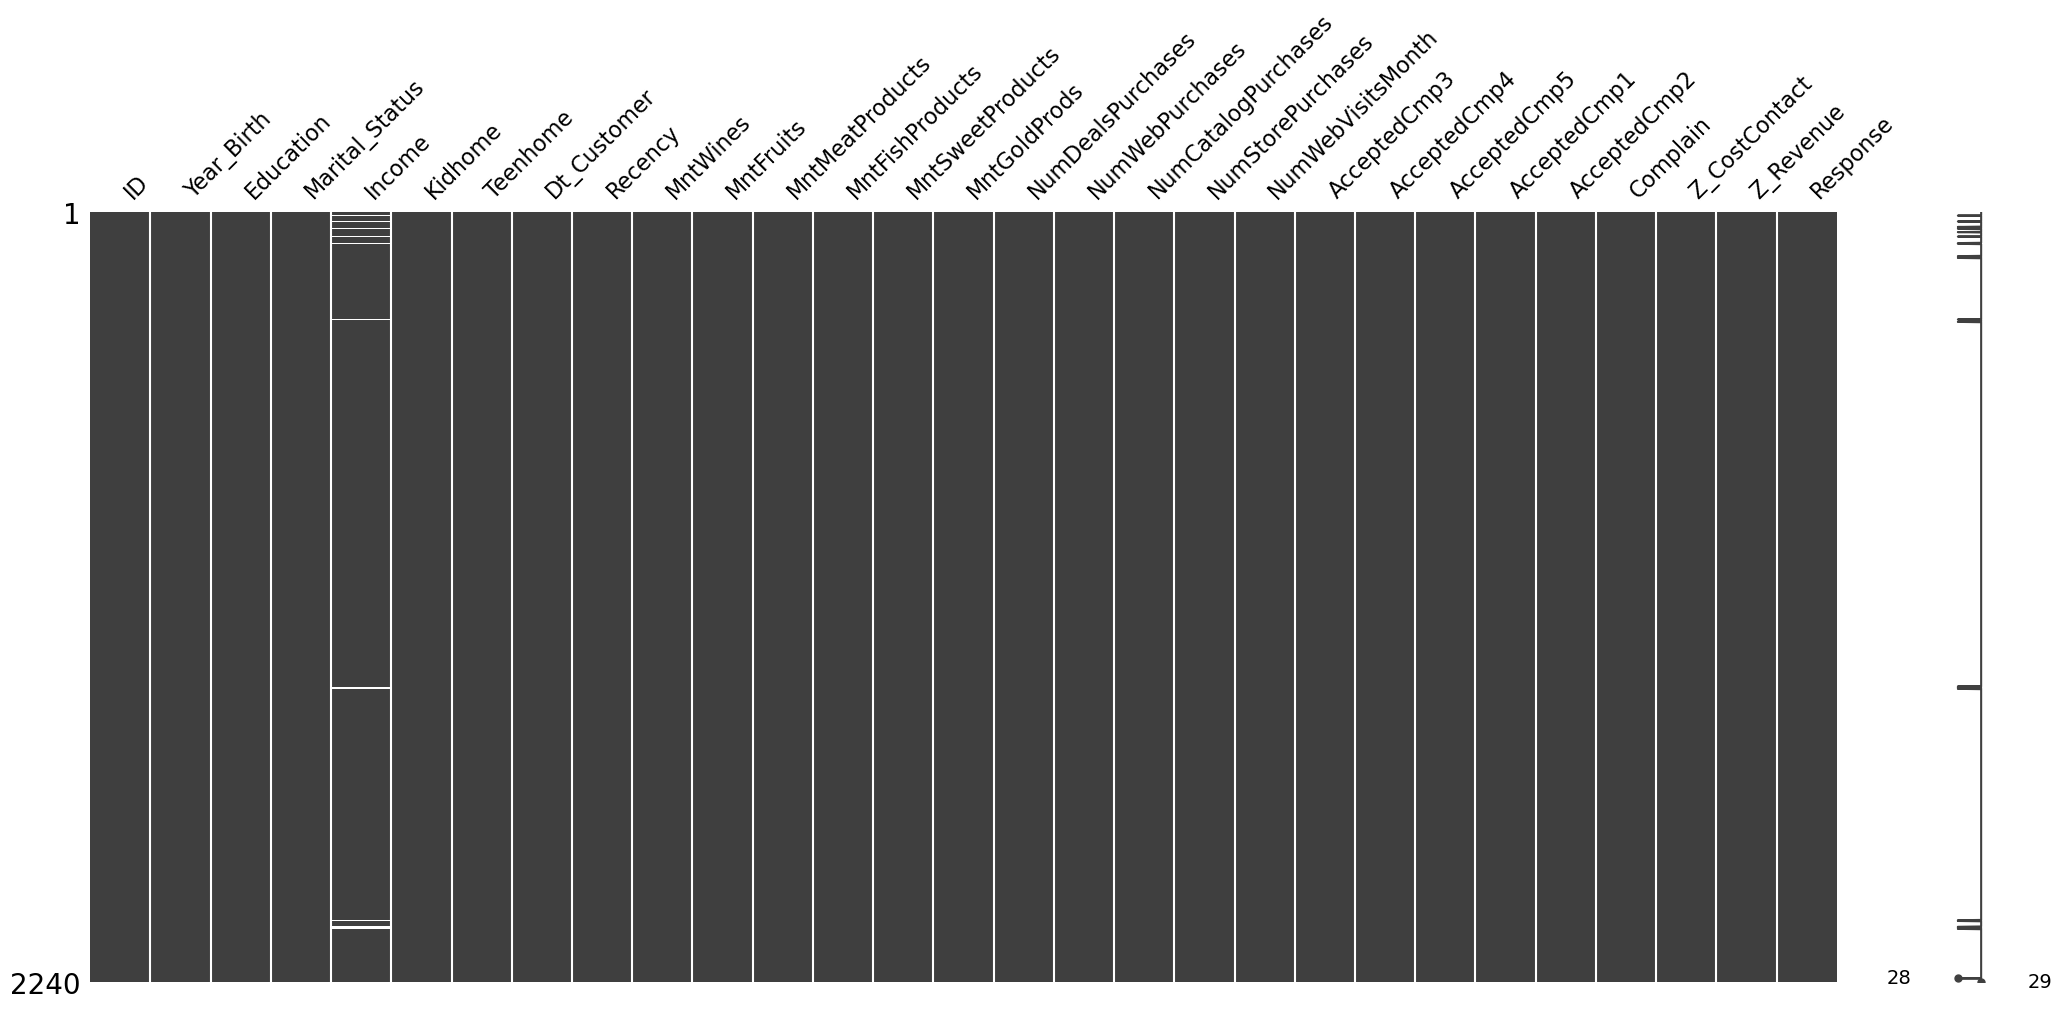

In [5]:
msno.matrix(df)

In [6]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

As we can see there is an occurence of missing value about 1% in the `Income` column, one could say that this is relatively small proportion of missing values, and in there is no other missing values found in the other column, therefore dropping the missing value can solve this problem

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### Data Duplicate Identification and Termination 

In [9]:
df.duplicated().sum()

0

There is no data duplicate found

### Feature Engineering

In [10]:
df_feature_obj = df.columns[df.dtypes == object]
df_feature_obj

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In the feature engineering section, we took a look deeper into the dataset and check if there are some features that need some special treatments, for example the occurences of unnecessary or redundant information. To deliver a high quality of report, we decided to improve some features, for example in the `Education` column, we classify the level of education into three groups. Moreover, in the `Marital_Status` column, it majorly comprises of unnecessary information, thus we categorized the information into two groups.

In [13]:
df['Education'] = df['Education'].map({
    'PhD': 'Postgraduate',
    'Master': 'Postgraduate',
    'Graduation': 'Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic': 'Undergraduate'
})

In [14]:
df['Living_Cond'] = df['Marital_Status'].map({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Single',
    'Widow': 'Single',
    'YOLO': 'Single',
    'Divorced': 'Single',
    'Alone':'Single'
})

Feature extraction is also provided to obtained some information by combining some features, there are some feature extraction that can be used for data analysis as follows:

Generating feature `Total Children` to merge `Kidhome` and `Teenhome` 

In [15]:
df['Total_Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

Generating feature `Expense` to indicate total amount of spent by the customer in different category of comodities in the span of 2 years

In [16]:
df['Expense'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

`Age` also can be extracted from feature `Year_Birth`

In [17]:
df['Age'] = 2023 - df['Year_Birth']

We need to check for outliers in the age feature, and eliminate them and binning this feature for analytics needs.

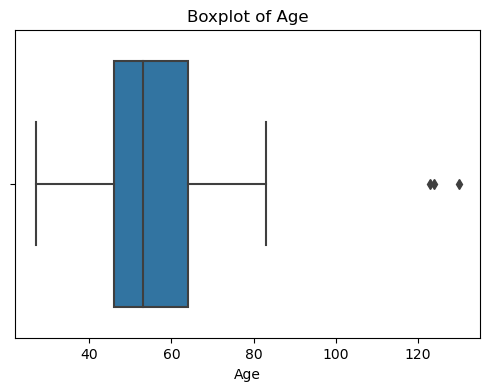

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show() 

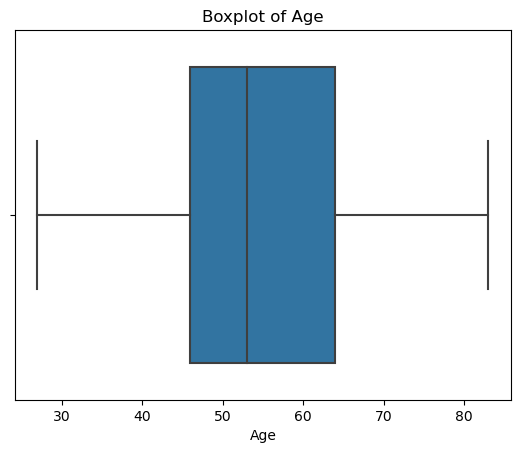

In [19]:
df = df[(df['Age'] <= 100)]
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

In [20]:
ag = [df]
age_groups = ['<30', '31-45', '46-60', '61-75', '>75']

for column in ag:
    column.loc[column["Age"] < 30,  'age_group'] = '<30'
    column.loc[(column["Age"] >= 31) & (column["Age"] <= 45), 'age_group'] = '31-45'
    column.loc[(column["Age"] >= 46) & (column["Age"] <= 60), 'age_group'] = '46-60'
    column.loc[(column["Age"] >= 61) & (column["Age"] <= 75), 'age_group'] = '61-75'
    column.loc[column["Age"] > 75, 'age_group'] = '>75'

`Dt_Customer` also can be extracted using pd.to_datetime

In [21]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [22]:
df['year'] = df.Dt_Customer.dt.year
df['month'] = df.Dt_Customer.dt.month
df['day'] = df.Dt_Customer.dt.day

Dropping redundant and unnecessary features

In [23]:
data_drop = ['ID','Year_Birth','Marital_Status','Kidhome','Teenhome', 'Z_CostContact', 'Z_Revenue']
df = df.drop(data_drop, axis=1)

In [24]:
df

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Living_Cond,Total_Children,Expense,Age,age_group,year,month,day
0,Graduate,58138.0,2012-04-09,58,635,88,546,172,88,88,...,0,1,NaN,0,1617,66,61-75,2012,4,9
1,Graduate,46344.0,2014-08-03,38,11,1,6,2,1,6,...,0,0,NaN,2,27,69,61-75,2014,8,3
2,Graduate,71613.0,2013-08-21,26,426,49,127,111,21,42,...,0,0,Partner,0,776,58,46-60,2013,8,21
3,Graduate,26646.0,2014-10-02,26,11,4,20,10,3,5,...,0,0,Partner,1,53,39,31-45,2014,10,2
4,Postgraduate,58293.0,2014-01-19,94,173,43,118,46,27,15,...,0,0,Partner,1,422,42,31-45,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,2013-06-13,46,709,43,182,42,118,247,...,0,0,Partner,1,1341,56,46-60,2013,6,13
2236,Postgraduate,64014.0,2014-10-06,56,406,0,30,0,0,8,...,0,0,Partner,3,444,77,>75,2014,10,6
2237,Graduate,56981.0,2014-01-25,91,908,48,217,32,12,24,...,0,0,Single,0,1241,42,31-45,2014,1,25
2238,Postgraduate,69245.0,2014-01-24,8,428,30,214,80,30,61,...,0,0,Partner,1,843,67,61-75,2014,1,24


In [25]:
df.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Living_Cond', 'Total_Children',
       'Expense', 'Age', 'age_group', 'year', 'month', 'day'],
      dtype='object')

# Data Analytics

#### Promotion Data Analytics

In [26]:
data_promotion = df[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']]

In [27]:
data_promotion.describe()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,2.325350,0.064166,0.013556,0.073656,0.074108,0.072752,0.150474
std,1.924402,0.245104,0.115666,0.261269,0.262005,0.259788,0.357617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


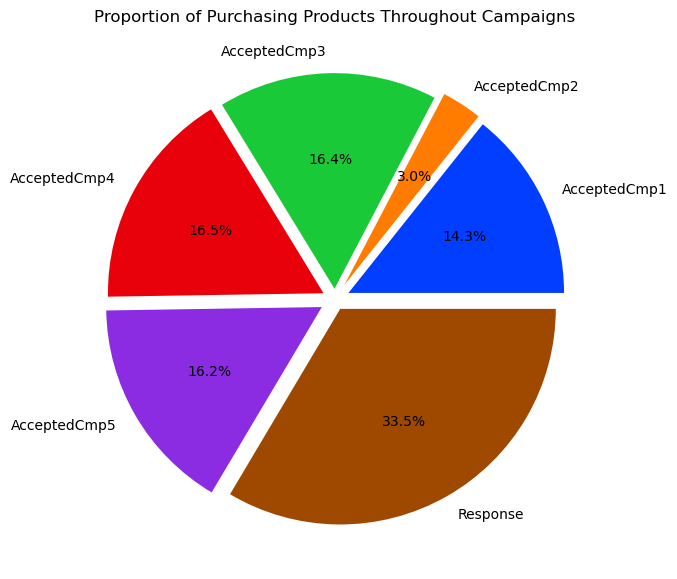

In [28]:
# Get the total number of purchases made through each medium
total_purchases_by_promotion = data_promotion.drop('NumDealsPurchases', axis=1).sum()

# Create a list of labels for the pie chart
labels = total_purchases_by_promotion.index.tolist()

# Create a list of values for the pie chart
values = total_purchases_by_promotion.values.tolist()

# Create the pie chart
plt.figure(figsize=(10,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=[0.07, 0.08, 0.05,0.06,0.07,0.05],startangle=0, colors=sns.color_palette('bright'))

# Add a title to the pie chart
plt.title('Proportion of Purchasing Products Throughout Campaigns')

# Show the pie chart
plt.show()

In [29]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for idx, campaign_column in enumerate(campaign_columns, start=1):
    if campaign_column == 'Response':
        campaign_name = 'last campaign'
    else:
        campaign_name = f"campaign {idx}"
    accepted_count = data_promotion[campaign_column].sum()
    print(f"Total customer that accept the offer in the {campaign_name}: {accepted_count}")

discount_purchase_count = data_promotion['NumDealsPurchases'].sum()
print("\nTotal count of purchases made with a discount:", discount_purchase_count)

total_transaction_campaign = data_promotion[campaign_columns].sum().sum()
print("Total transaction during campaigns:", total_transaction_campaign)

Total customer that accept the offer in the campaign 1: 142
Total customer that accept the offer in the campaign 2: 30
Total customer that accept the offer in the campaign 3: 163
Total customer that accept the offer in the campaign 4: 164
Total customer that accept the offer in the campaign 5: 161
Total customer that accept the offer in the last campaign: 333

Total count of purchases made with a discount: 5146
Total transaction during campaigns: 993


Based on the data, the most offers taken by customers were during the last marketing campaign with 333 offers received, and the least during the second marketing campaign with only 30 offers received. The total number of transactions using discounts is 5149 times, this is interesting because the number of customers who received offers during the marketing campaign was only 994 times, it is possible that the total transactions using discounts were recorded for transactions outside the marketing campaign. 

In [30]:
# Calculate the count of customers who have values in NumDealsPurchases, AcceptedCmp1-5, and Response
numdeals_accepted_response_count = data_promotion[
    (data_promotion['NumDealsPurchases'] > 0) &
    (data_promotion['AcceptedCmp1'] + data_promotion['AcceptedCmp2'] +
     data_promotion['AcceptedCmp3'] + data_promotion['AcceptedCmp4'] +
     data_promotion['AcceptedCmp5'] + data_promotion['Response'] > 0)
].shape[0]

print("Total customers using discount in the marketing campaign 1st - last:", numdeals_accepted_response_count)

discount_percentage_in_campaign = (numdeals_accepted_response_count / discount_purchase_count) * 100
formatted_percentage = f"{discount_percentage_in_campaign:.2f}%"
print("\nTotal percentage of customers using discount in the marketing campaign 1st - last:", formatted_percentage)

Total customers using discount in the marketing campaign 1st - last: 578

Total percentage of customers using discount in the marketing campaign 1st - last: 11.23%


__Observation:__  
* Customers predominantly accepted the offer during the last marketing campaign and the least during the 2nd marketing campaign. 
* It can be seen that there are still relatively few customers who accept offers in marketing campaigns that use discounts at a percentage of 11.23%. This indicates the need to improve marketing quality in offering discounts in the next marketing campaign.

#### Sales in Various Medium Data Analytics

In [31]:
data_place = df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [32]:
data_place.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2213.000000,2213.000000,2213.000000,2213.000000
mean,4.087664,2.671487,5.805242,5.321735
std,2.741664,2.927096,3.250752,2.425092
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000
50%,4.000000,2.000000,5.000000,6.000000
75%,6.000000,4.000000,8.000000,7.000000
max,27.000000,28.000000,13.000000,20.000000


Based on the table above, it can be seen that the average number of transactions is highest for in-store purchases and lowest for catalog purchases. However, there was a recorded instance where the highest number of transactions occurred through catalog purchases, with a total of 28 transactions.

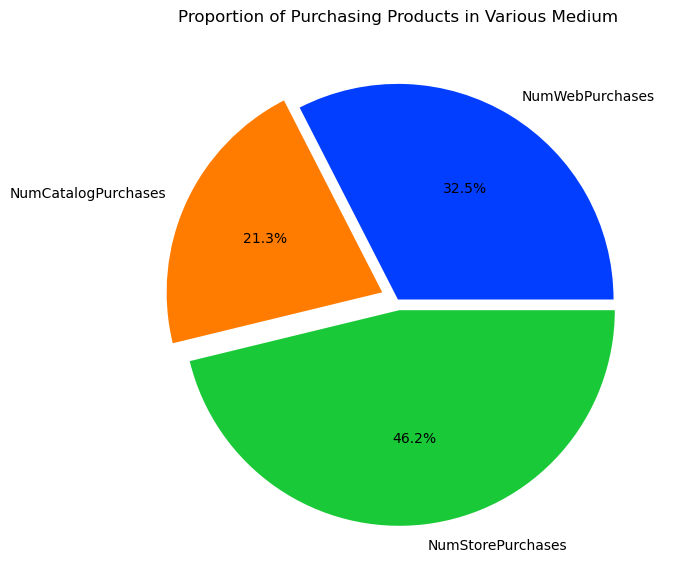

In [33]:
# Get the total number of purchases made through each medium
total_purchases_by_place = data_place.drop('NumWebVisitsMonth', axis=1).sum()

# Create a list of labels for the pie chart
labels = total_purchases_by_place.index.tolist()

# Create a list of values for the pie chart
values = total_purchases_by_place.values.tolist()

# Create the pie chart
plt.figure(figsize=(10,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=[0, 0.08, 0.05],startangle=0, colors=sns.color_palette('bright'))

# Add a title to the pie chart
plt.title('Proportion of Purchasing Products in Various Medium')

# Show the pie chart
plt.show()

Based on the pie chart, it can be seen that the highest proportion of transactions were made in-store, while the lowest proportion of transactions were made using the catalog. We can evaluate from here to boost sales through catalogs and maintain transactions through stores and websites.

In [34]:
purchase_types = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
purchase_counts = []

for purchase_type in purchase_types[:-1]:
    total_count = data_place[purchase_type].sum()
    purchase_counts.append(total_count)
    print(f"Total count of {purchase_type.replace('Num', '').replace('Purchases', '').replace('VisitsMonth', '').lower()} purchase:", total_count)

web_visit_count = data_place[purchase_types[-1]].sum()
print("\nTotal count of web visit in the last month:", web_visit_count)


Total count of web purchase: 9046
Total count of catalog purchase: 5912
Total count of store purchase: 12847

Total count of web visit in the last month: 11777


Based on the data, the highest number of transactions was through direct purchases in stores with 12,855 transactions and the least through catalog purchases with 5,919 transactions. 

In [35]:
web_visits_and_store_purchases = df[(df['NumWebVisitsMonth'] > 0) & (df['NumStorePurchases'] > 0)]
total_customers_buy_via_store = len(web_visits_and_store_purchases)
print("Total customers who made web visits and store purchases:", total_customers_buy_via_store)

Total customers who made web visits and store purchases: 2192


In [37]:
transaction_store_afterwebvisit_percentage = (total_customers_buy_via_store / web_visit_count) * 100
formatted_percentage = f"{transaction_store_afterwebvisit_percentage:.2f}%"
print("\nTotal percentage of customers using transaction via store after web visitation:", formatted_percentage)


Total percentage of customers using transaction via store after web visitation: 18.61%


It turns out that only 18.62% of customers who conduct web visitation first then make transactions in the store

In [38]:
web_visits_and_catalog_purchases = df[(df['NumWebVisitsMonth'] > 0) & (df['NumCatalogPurchases'] > 0)]
total_customers_buy_via_catalog = len(web_visits_and_catalog_purchases)
print("Total customers who made web visits and catalog purchases:", total_customers_buy_via_catalog)

Total customers who made web visits and catalog purchases: 1630


In [39]:
transaction_catalog_afterwebvisit_percentage = (total_customers_buy_via_catalog / web_visit_count) * 100
formatted_percentage = f"{transaction_catalog_afterwebvisit_percentage:.2f}%"
print("\nTotal percentage of customers using transaction via catalog after web visitation:", formatted_percentage)


Total percentage of customers using transaction via catalog after web visitation: 13.84%


Apparently, only 13.85% of customers make a web visit first and then make a transaction via catalog.

In [40]:
web_visits_and_purchases = df[(df['NumWebVisitsMonth'] > 0) & (df['NumWebPurchases'] > 0)]
total_customers_buy_via_web = len(web_visits_and_purchases)
print("Total customers who made web visits and web purchases:", total_customers_buy_via_web)

Total customers who made web visits and web purchases: 2159


In [41]:
transaction_website_percentage = (total_customers_buy_via_web / web_visit_count) * 100
formatted_percentage = f"{transaction_website_percentage:.2f}%"
print("\nTotal percentage of customers using transaction via website after web visitation:", formatted_percentage)


Total percentage of customers using transaction via website after web visitation: 18.33%


However, there are 18.34% percent of customers who previously visited the website to check the goods finally made a transaction. This number is quite potential and it is recommended in the future to improve the quality of the website to attract customers to make direct transactions on the website.

__Observation:__  
* The customers make a transaction after visit the website, predominantly directly transacting on the website or going to the store.

#### Various Medium - Promotion Data Analysis 

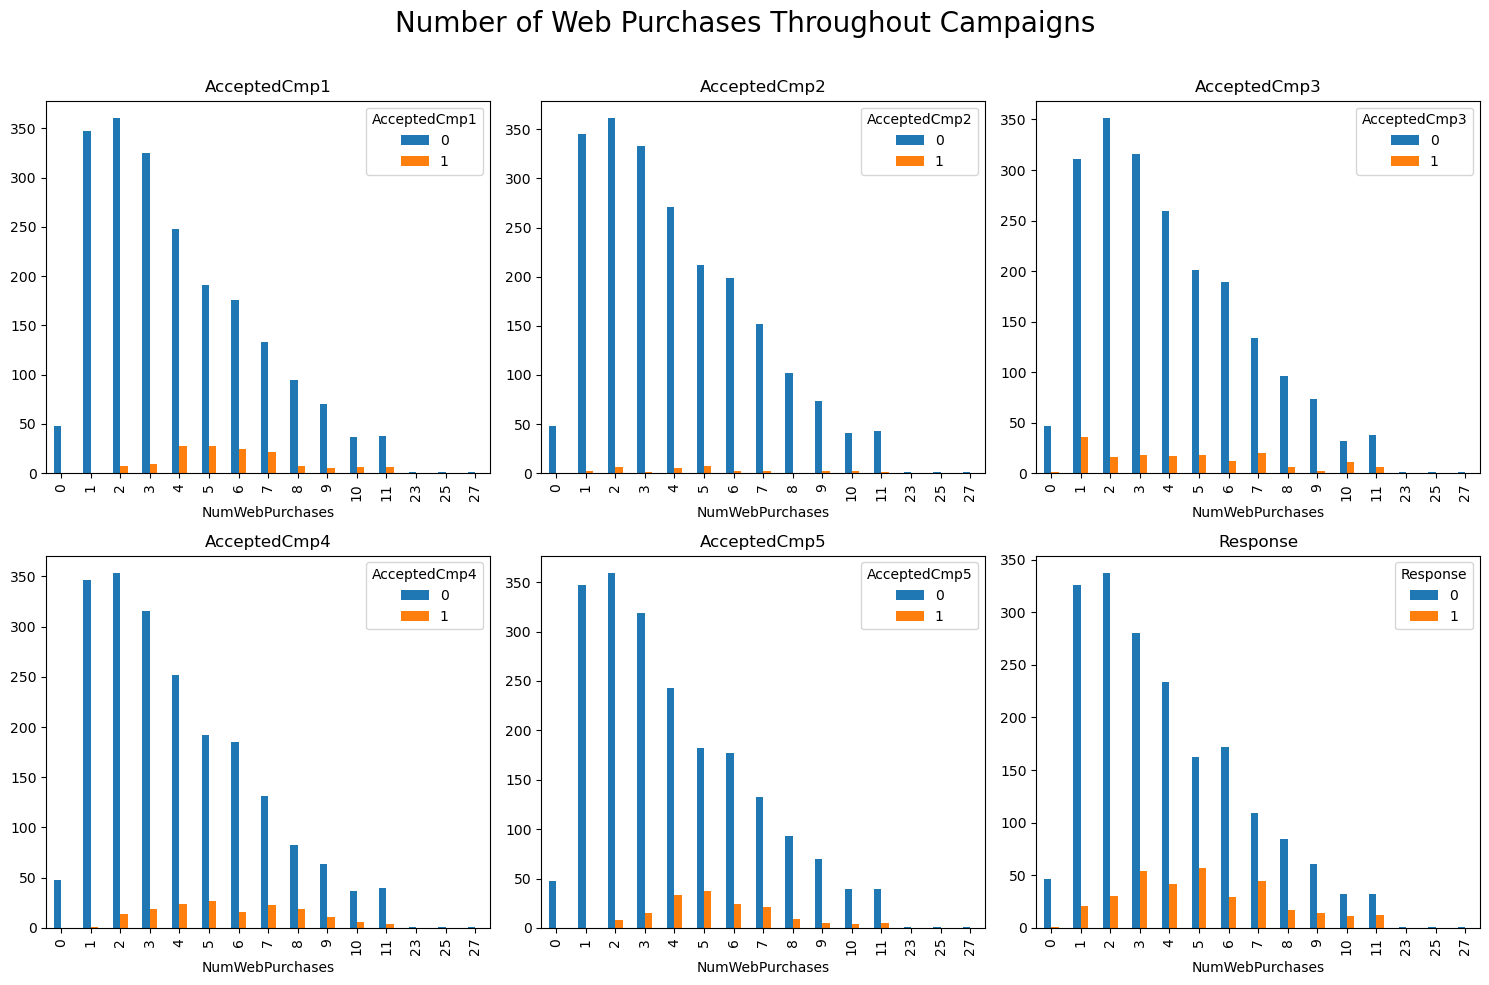

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First set of plots
pd.crosstab(data_place['NumWebPurchases'], data_promotion['AcceptedCmp1']).plot(kind='bar', ax=axs[0,0])
pd.crosstab(data_place['NumWebPurchases'], data_promotion['AcceptedCmp2']).plot(kind='bar', ax=axs[0,1])
pd.crosstab(data_place['NumWebPurchases'], data_promotion['AcceptedCmp3']).plot(kind='bar', ax=axs[0,2])

# Second set of plots
pd.crosstab(data_place['NumWebPurchases'], data_promotion['AcceptedCmp4']).plot(kind='bar', ax=axs[1,0])
pd.crosstab(data_place['NumWebPurchases'], data_promotion['AcceptedCmp5']).plot(kind='bar', ax=axs[1,1])
pd.crosstab(data_place['NumWebPurchases'], data_promotion['Response']).plot(kind='bar', ax=axs[1,2])

axs[0,0].set_title("AcceptedCmp1")
axs[0,1].set_title("AcceptedCmp2")
axs[0,2].set_title("AcceptedCmp3")
axs[1,0].set_title("AcceptedCmp4")
axs[1,1].set_title("AcceptedCmp5")
axs[1,2].set_title("Response")

fig.suptitle('Number of Web Purchases Throughout Campaigns\n', fontsize = 20)
plt.tight_layout()
plt.show()

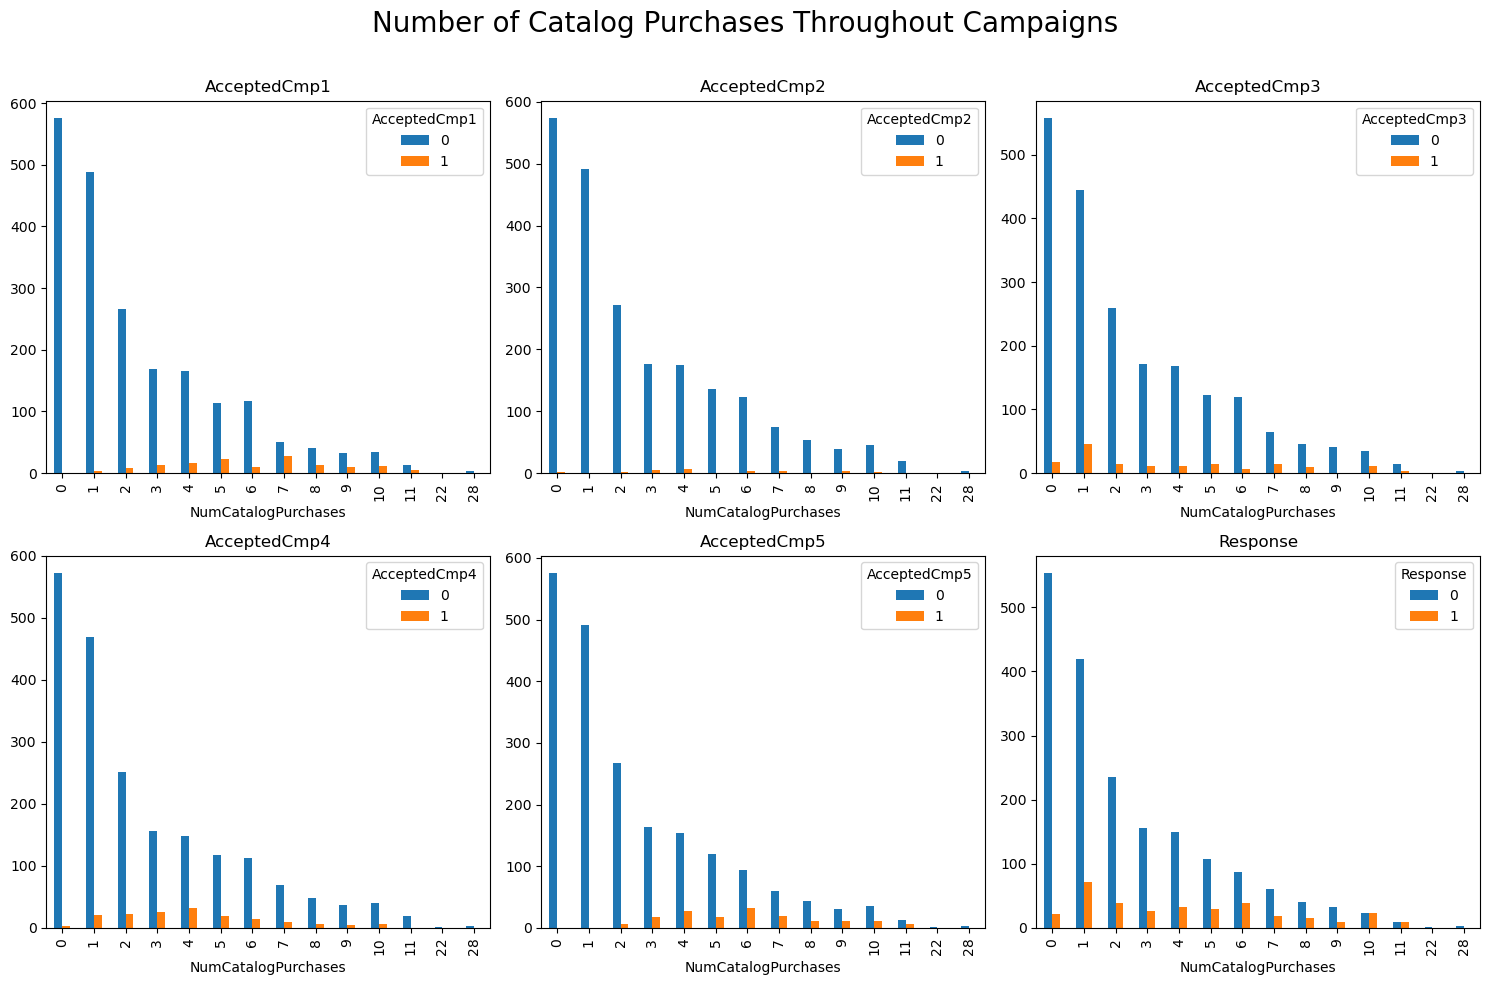

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First set of plots
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['AcceptedCmp1']).plot(kind='bar', ax=axs[0,0])
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['AcceptedCmp2']).plot(kind='bar', ax=axs[0,1])
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['AcceptedCmp3']).plot(kind='bar', ax=axs[0,2])

# Second set of plots
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['AcceptedCmp4']).plot(kind='bar', ax=axs[1,0])
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['AcceptedCmp5']).plot(kind='bar', ax=axs[1,1])
pd.crosstab(data_place['NumCatalogPurchases'], data_promotion['Response']).plot(kind='bar', ax=axs[1,2])

axs[0,0].set_title("AcceptedCmp1")
axs[0,1].set_title("AcceptedCmp2")
axs[0,2].set_title("AcceptedCmp3")
axs[1,0].set_title("AcceptedCmp4")
axs[1,1].set_title("AcceptedCmp5")
axs[1,2].set_title("Response")

fig.suptitle('Number of Catalog Purchases Throughout Campaigns\n', fontsize = 20)
plt.tight_layout()
plt.show()

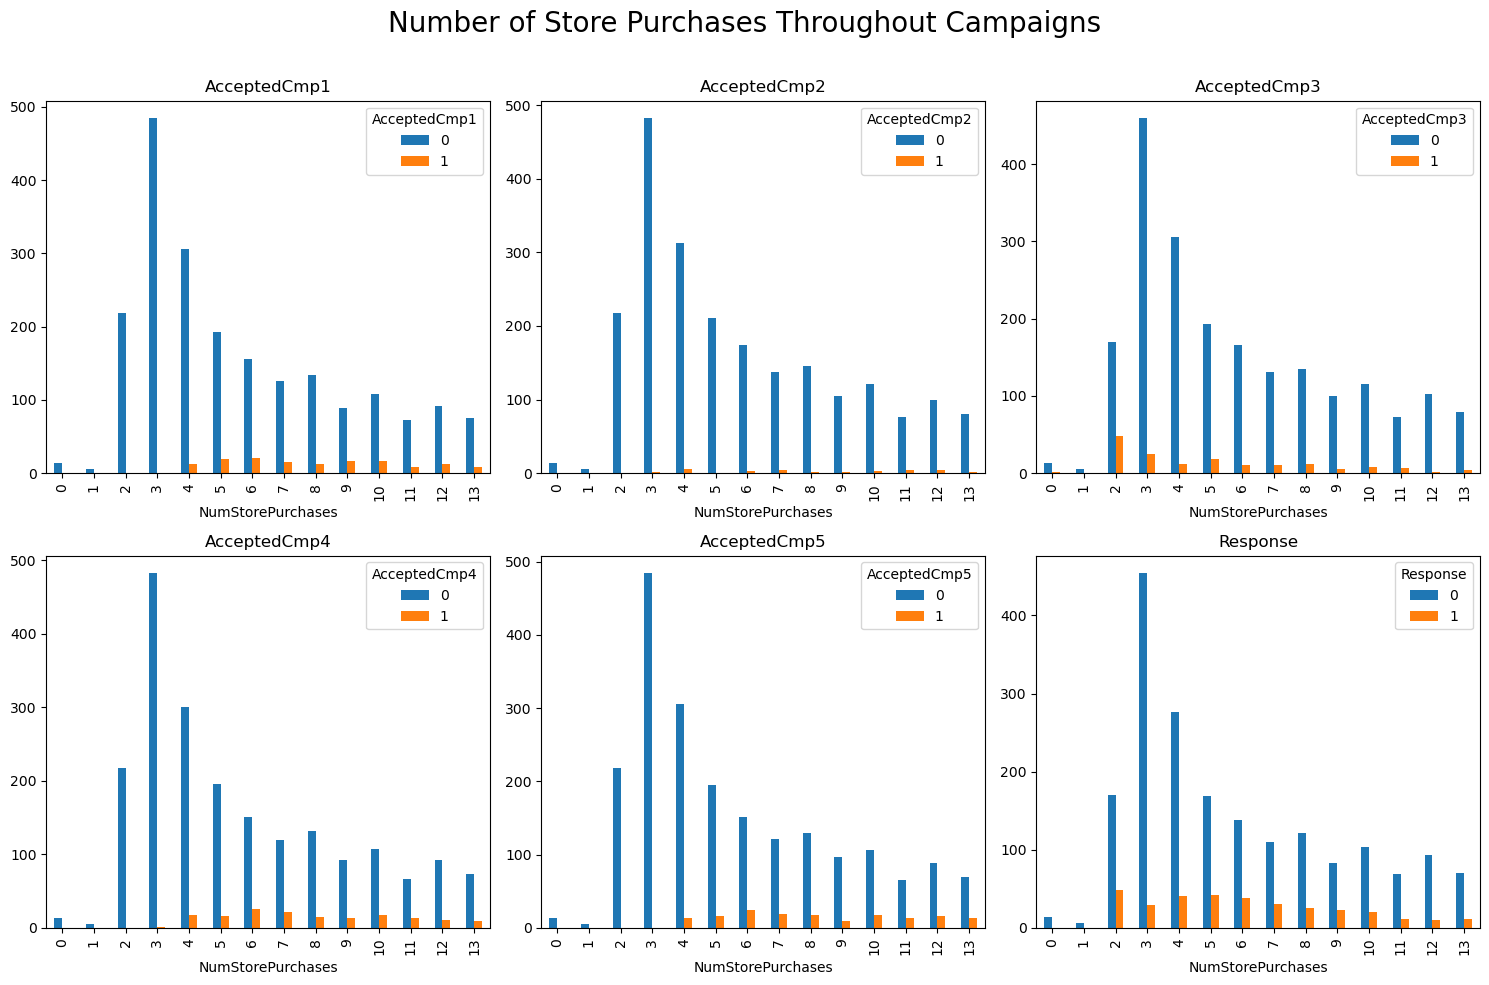

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First set of plots
pd.crosstab(data_place['NumStorePurchases'], data_promotion['AcceptedCmp1']).plot(kind='bar', ax=axs[0,0])
pd.crosstab(data_place['NumStorePurchases'], data_promotion['AcceptedCmp2']).plot(kind='bar', ax=axs[0,1])
pd.crosstab(data_place['NumStorePurchases'], data_promotion['AcceptedCmp3']).plot(kind='bar', ax=axs[0,2])

# Second set of plots
pd.crosstab(data_place['NumStorePurchases'], data_promotion['AcceptedCmp4']).plot(kind='bar', ax=axs[1,0])
pd.crosstab(data_place['NumStorePurchases'], data_promotion['AcceptedCmp5']).plot(kind='bar', ax=axs[1,1])
pd.crosstab(data_place['NumStorePurchases'], data_promotion['Response']).plot(kind='bar', ax=axs[1,2])

axs[0,0].set_title("AcceptedCmp1")
axs[0,1].set_title("AcceptedCmp2")
axs[0,2].set_title("AcceptedCmp3")
axs[1,0].set_title("AcceptedCmp4")
axs[1,1].set_title("AcceptedCmp5")
axs[1,2].set_title("Response")

fig.suptitle('Number of Store Purchases Throughout Campaigns\n', fontsize = 20)
plt.tight_layout()
plt.show()

__Observation:__  
* The final marketing campaign showed a higher acceptance rate among customers for offers tied to website-based purchases, implying a successful engagement strategy. Conversely, the 2nd marketing campaign struggled to attract customers towards website-based purchases, potentially indicating room for improvement in its approach.

* A similar pattern emerged for catalog purchases, with the last campaign garnering more positive responses, highlighting its effectiveness in engaging customers compared to the 2nd campaign.

* In-store purchases also experienced a similar trend, with the last marketing campaign yielding a higher acceptance rate of offers, indicating an overall successful engagement strategy.

#### Product Sales Analysis

In [45]:
data_product = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

In [46]:
data_product.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432
std,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000
75%,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


__Observation:__  
* Sales of wine and meat products are so significant compared to other products, it can be seen that there were transactions of these two products up to above 1000 pieces.

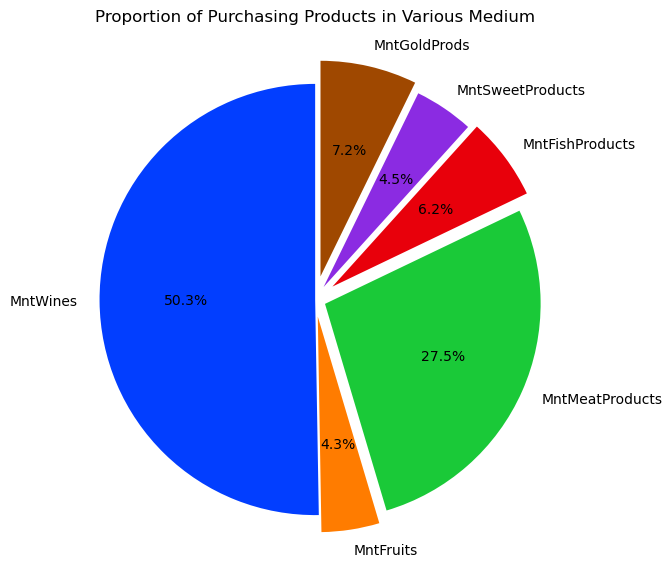

In [47]:
# Get the total number of purchases made through each medium
total_purchases_by_product = data_product.sum()

# Create a list of labels for the pie chart
labels = total_purchases_by_product.index.tolist()

# Create a list of values for the pie chart
values = total_purchases_by_product.values.tolist()

# Create the pie chart
plt.figure(figsize=(10,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=[0, 0.08, 0.05,0.1,0.07,0.11],startangle=90, colors=sns.color_palette('bright'))

# Add a title to the pie chart
plt.title('Proportion of Purchasing Products in Various Medium')

# Show the pie chart
plt.show()

It can be seen that 50.3% of the best-selling products are wine products

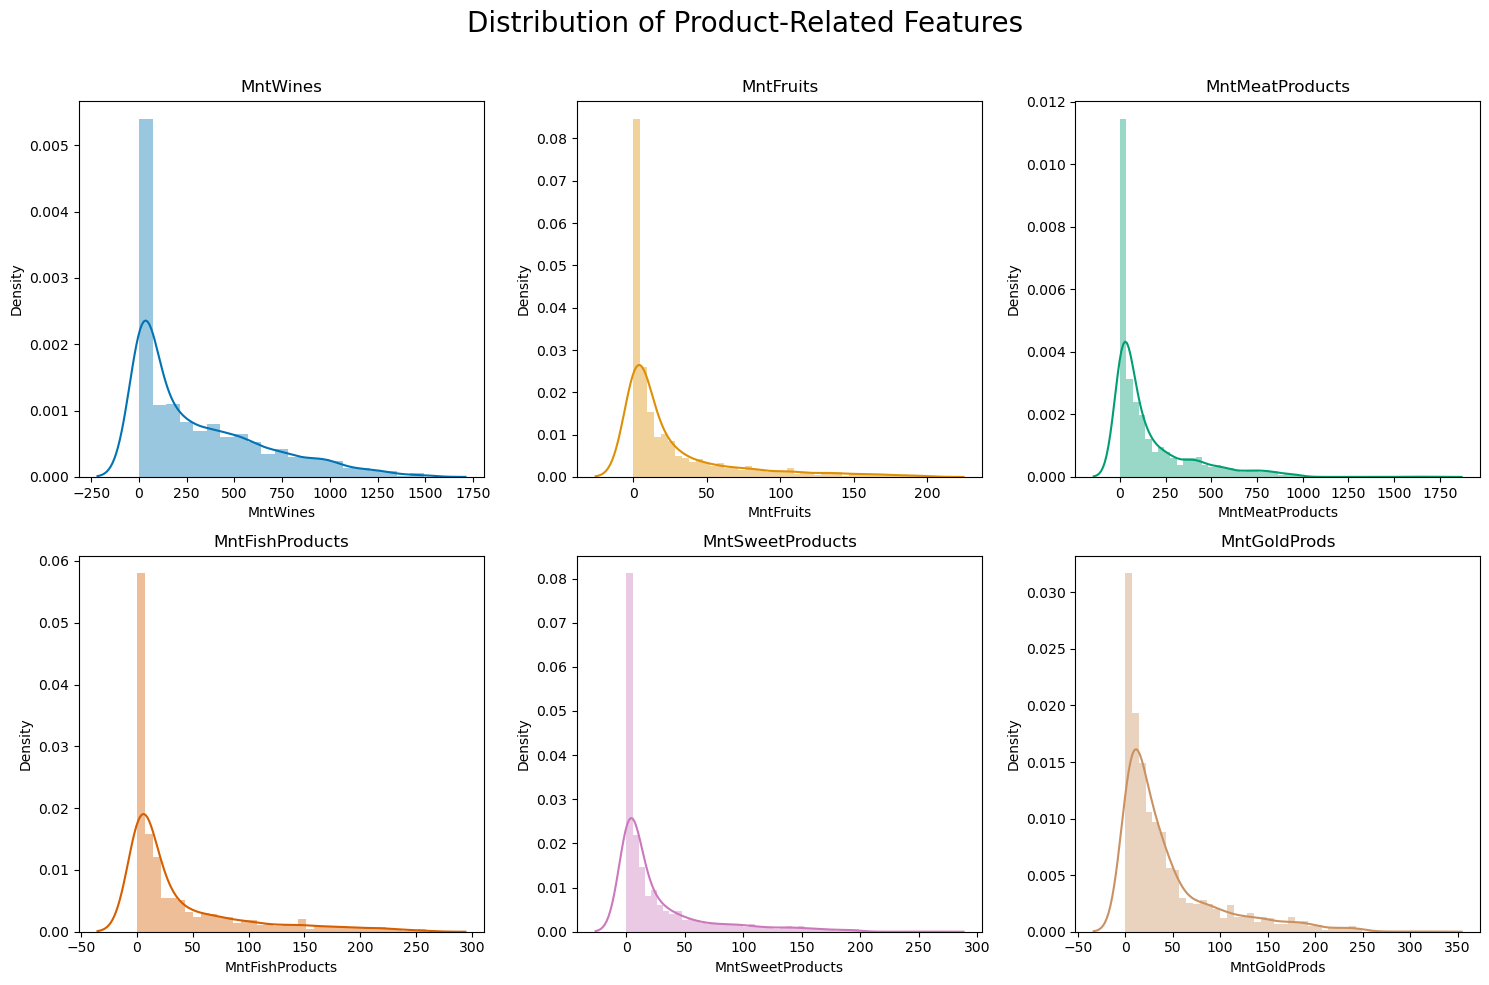

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

colors = sns.color_palette('colorblind', len(data_product.columns))

for col, ax, color in zip(data_product.columns, axes.flatten(), colors):
    sns.distplot(df[col], ax=ax, color=color)
    ax.set_title(col)

fig.suptitle('Distribution of Product-Related Features\n', fontsize = 20)
    
plt.tight_layout()
plt.show()

All product features show a right-skewed distribution so a median approach will be used for analysis.

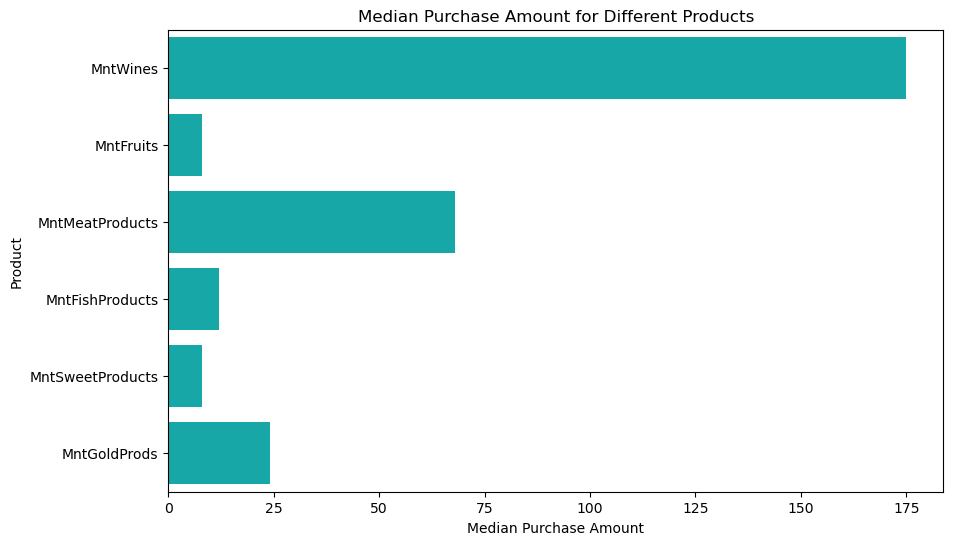

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_product.median(), y=data_product.columns, color='c')
plt.xlabel('Median Purchase Amount')
plt.ylabel('Product')
plt.title('Median Purchase Amount for Different Products')
plt.show()

The median of the highest-selling product, the wine product, is 175

In [50]:
wine_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntWines', aggfunc='median')
display(wine_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,185.5,184.0
Postgraduate,224.0,267.0
Undergraduate,16.0,176.0


In [51]:
fruit_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntFruits', aggfunc='median')
display(fruit_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,10.0,10.5
Postgraduate,5.0,7.0
Undergraduate,11.0,10.0


In [52]:
meat_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntMeatProducts', aggfunc='median')
display(meat_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,73.0,85.5
Postgraduate,69.0,71.0
Undergraduate,20.5,83.0


In [53]:
fish_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntFishProducts', aggfunc='median')
display(fish_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,13,14
Postgraduate,6,10
Undergraduate,15,29


In [54]:
sweet_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntSweetProducts', aggfunc='median')
display(sweet_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,11.0,11.0
Postgraduate,4.0,5.0
Undergraduate,8.5,8.0


In [55]:
gold_pivot = df.pivot_table(index='Education', columns='Living_Cond', values='MntGoldProds', aggfunc='median')
display(gold_pivot)

Living_Cond,Partner,Single
Education,,
Graduate,29,28
Postgraduate,17,25
Undergraduate,23,27


Wine is seen as the product that was sold the most to customers who have a postgraduate level of education, followed by those who are graduates, whether the customer is living in a partner or alone.

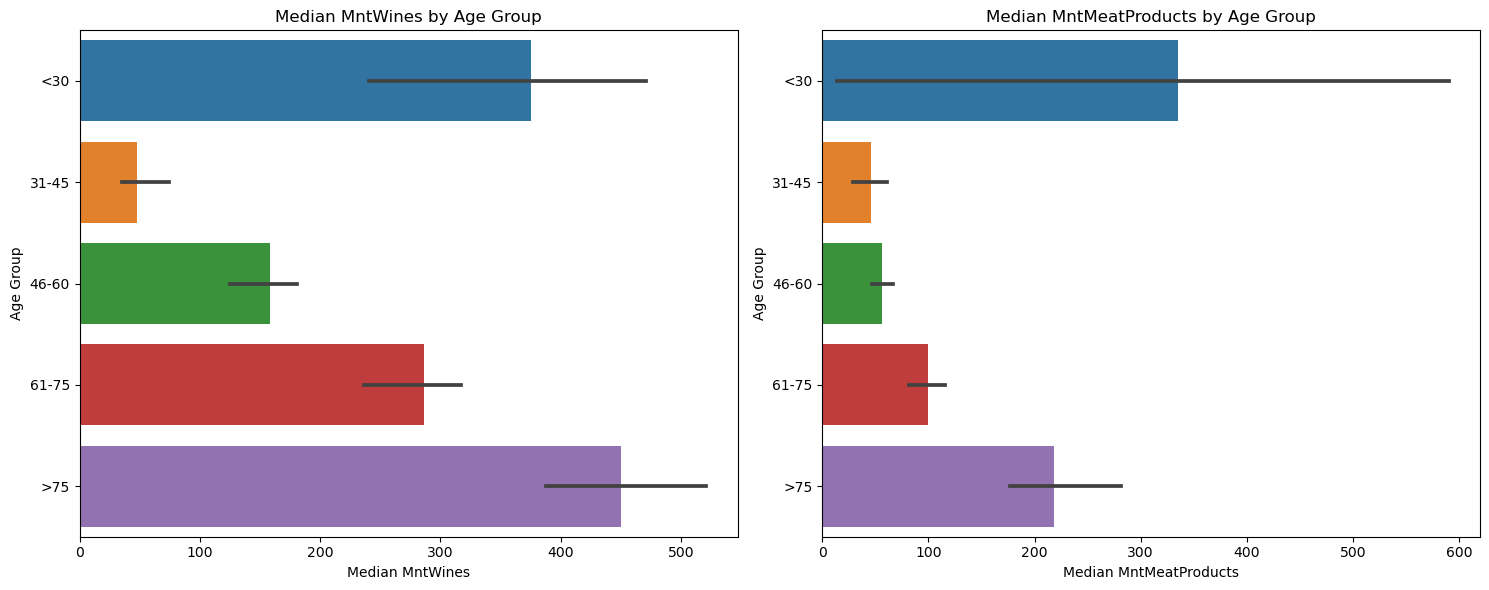

In [56]:
# Create a new column 'age_group' based on binning
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 75, 100], labels=age_groups)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Horizontal barplot for Median MntWines by Age Group
sns.barplot(x='MntWines', y='age_group', data=df, estimator='median', order=age_groups, ax=axes[0])
axes[0].set_xlabel('Median MntWines')
axes[0].set_ylabel('Age Group')
axes[0].set_title('Median MntWines by Age Group')

# Horizontal barplot for Median MntMeatProducts by Age Group
sns.barplot(x='MntMeatProducts', y='age_group', data=df, estimator='median', order=age_groups, ax=axes[1])
axes[1].set_xlabel('Median MntMeatProducts')
axes[1].set_ylabel('Age Group')
axes[1].set_title('Median MntMeatProducts by Age Group')

# Adjust layout
plt.tight_layout()
plt.show()

In [57]:
df['Age'].describe()

count    2213.000000
mean       54.082693
std        11.700216
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

Based on the data, the youngest customer buying wine is 27 years old, so it is safe from age restriction, because usually wine purchases can only be made if you are over 18 years old.

__Observation:__  
* Wine products were identified as the most sold products followed by meat products.

* The majority of customers who buy wine have a graduate level of education and above, whether they live in a couple or alone. 

* The age range of customers who buy wine is the majority at the age of >75 followed by the age group <30, while for the age range of customers who buy meat the majority are the age group <30 then >75.

* Based on the results from the observation, it could be that customers buy wine along with meat for celebrations or special occasions such as romantic dinners, parties, or other celebrations. 

#### Correlation Features

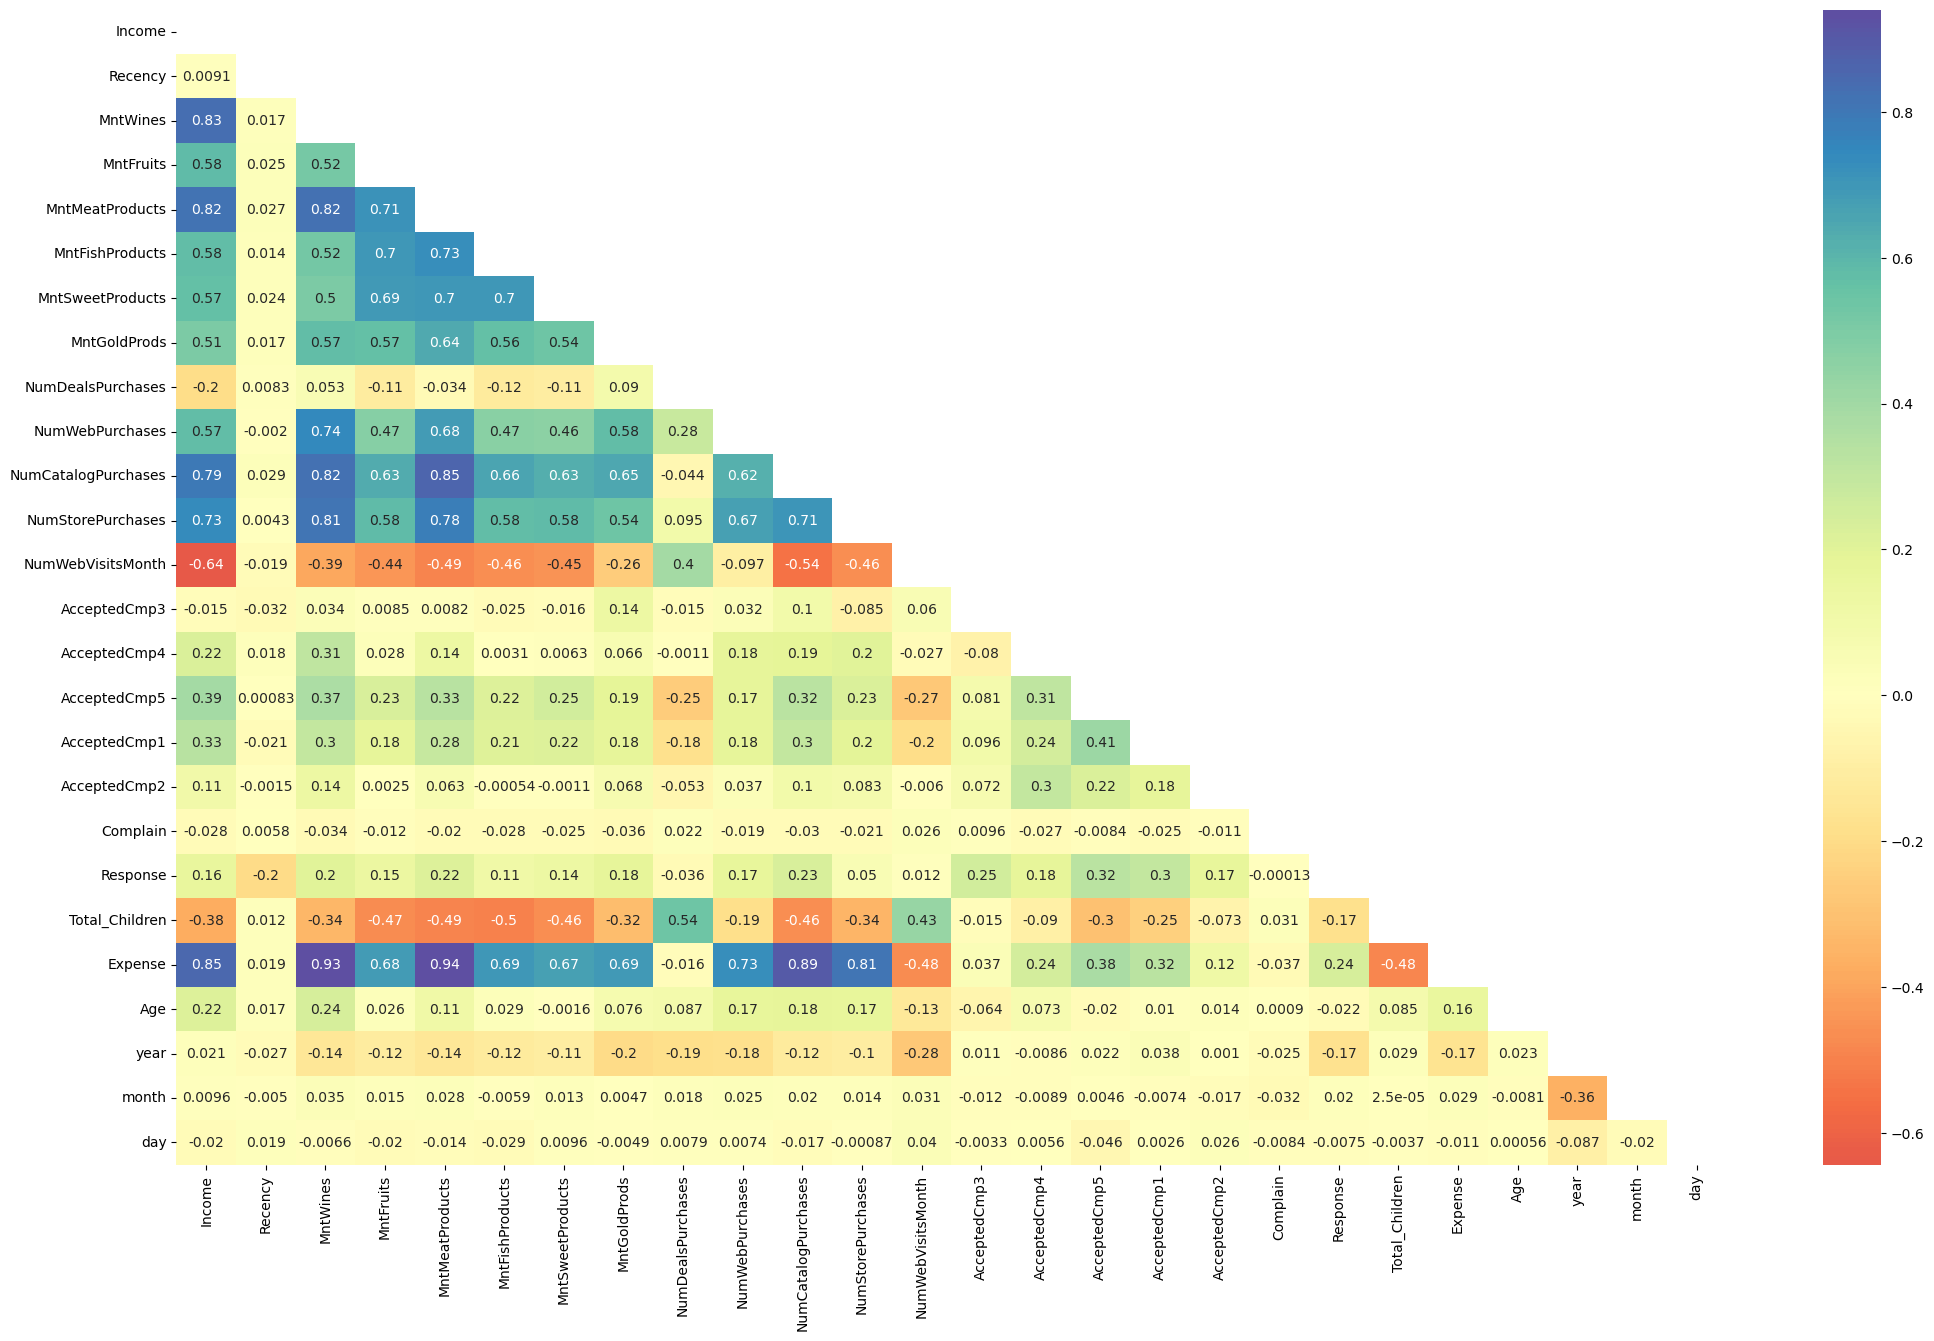

In [58]:
corrmat = df.corr(method='spearman')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(25,15))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

There are at least six features in the dataset having intermediate to strong positive correlations, those are `Income`, `MntWines`, `MntMeatProducts`,`NumCatalogPurchases`, `NumStorePurchases`, and `Expense`, and herewith we presented those five features correlation using table and scatterplots.

In [59]:
df[['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases','NumStorePurchases','Expense']].corr(method='spearman')

,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumStorePurchases,Expense
Income,1.000000,0.830507,0.817417,0.792270,0.733085,0.851579
MntWines,0.830507,1.000000,0.823769,0.822808,0.805633,0.928338
MntMeatProducts,0.817417,0.823769,1.000000,0.853684,0.780117,0.940110
NumCatalogPurchases,0.792270,0.822808,0.853684,1.000000,0.707471,0.893936
NumStorePurchases,0.733085,0.805633,0.780117,0.707471,1.000000,0.806500
Expense,0.851579,0.928338,0.940110,0.893936,0.806500,1.000000


In order to get a better visualization of each features relationship, first we need to check `Income` and `Expense` feature if there is any outlier

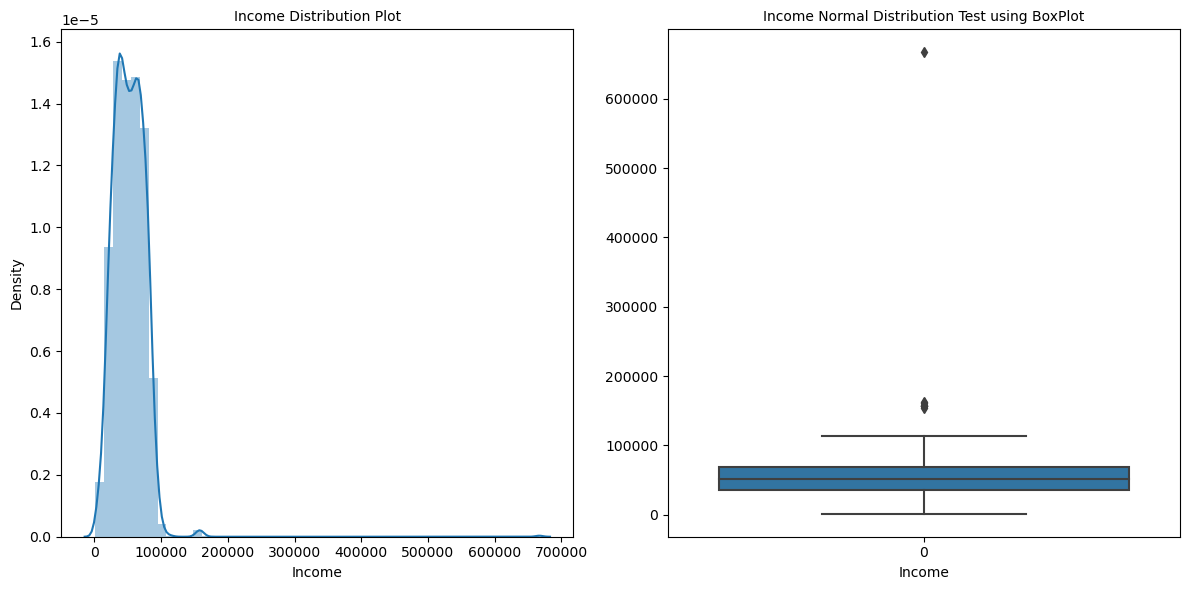

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.distplot(df['Income'], ax=axs[0])
axs[0].set_title('Income Distribution Plot', size=10)

sns.boxplot(df['Income'], ax=axs[1])
axs[1].set_title('Income Normal Distribution Test using BoxPlot', size=10)
axs[1].set_xlabel('Income', size=10)

fig.tight_layout()
plt.show()

We decide to display the scatter plot using `Income` < 200000 to avoid the outliers

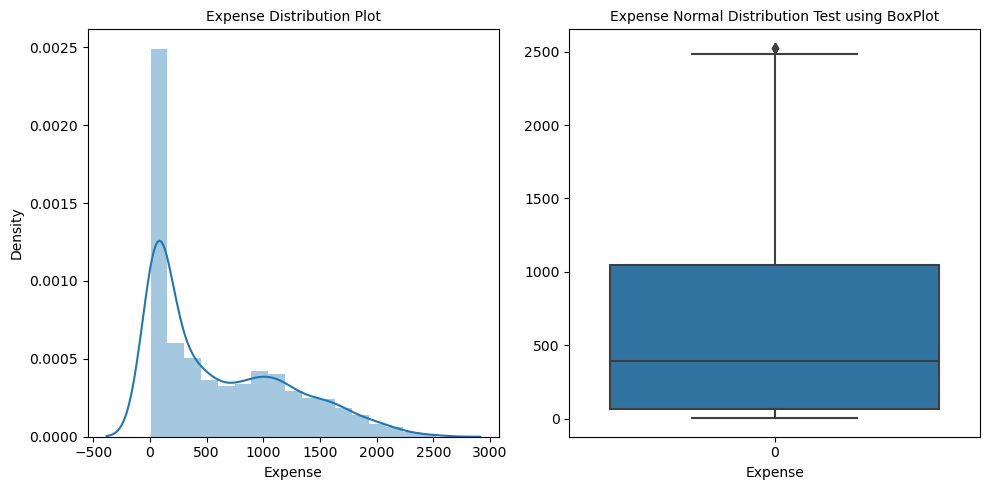

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.distplot(df['Expense'], ax=axs[0])
axs[0].set_title('Expense Distribution Plot', size=10)

sns.boxplot(df['Expense'], ax=axs[1])
axs[1].set_title('Expense Normal Distribution Test using BoxPlot', size=10)
axs[1].set_xlabel('Expense', size=10)

fig.tight_layout()
plt.show()

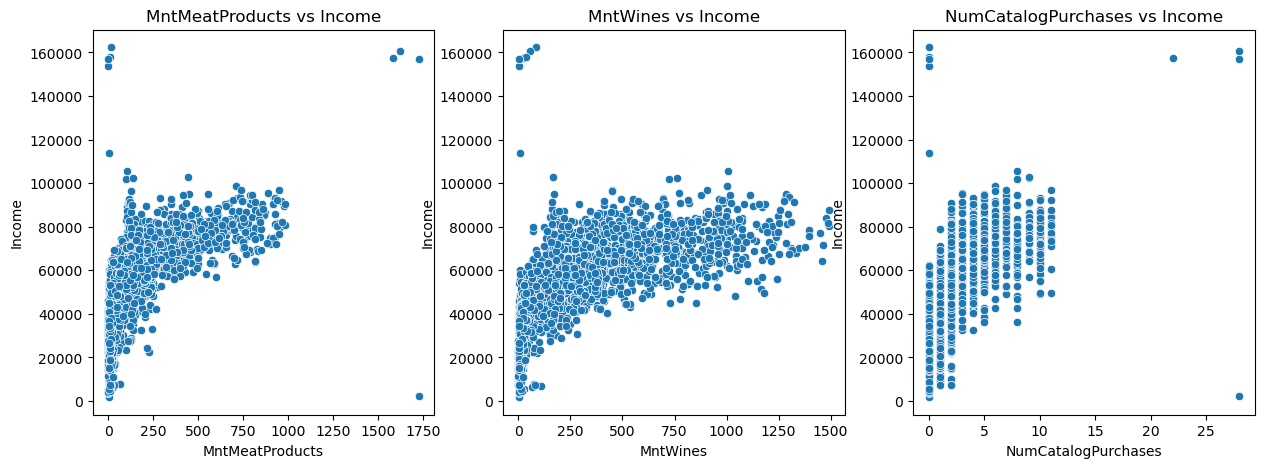

In [62]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))

sns.scatterplot(x=df['MntMeatProducts'], y=df[df['Income']<200000]['Income'], ax=axes[0])
axes[0].set_title('MntMeatProducts vs Income')

sns.scatterplot(x=df['MntWines'], y=df[df['Income']<200000]['Income'], ax=axes[1])
axes[1].set_title('MntWines vs Income')

sns.scatterplot(x=df['NumCatalogPurchases'], y=df[df['Income']<200000]['Income'], ax=axes[2])
axes[2].set_title('NumCatalogPurchases vs Income')

plt.show()

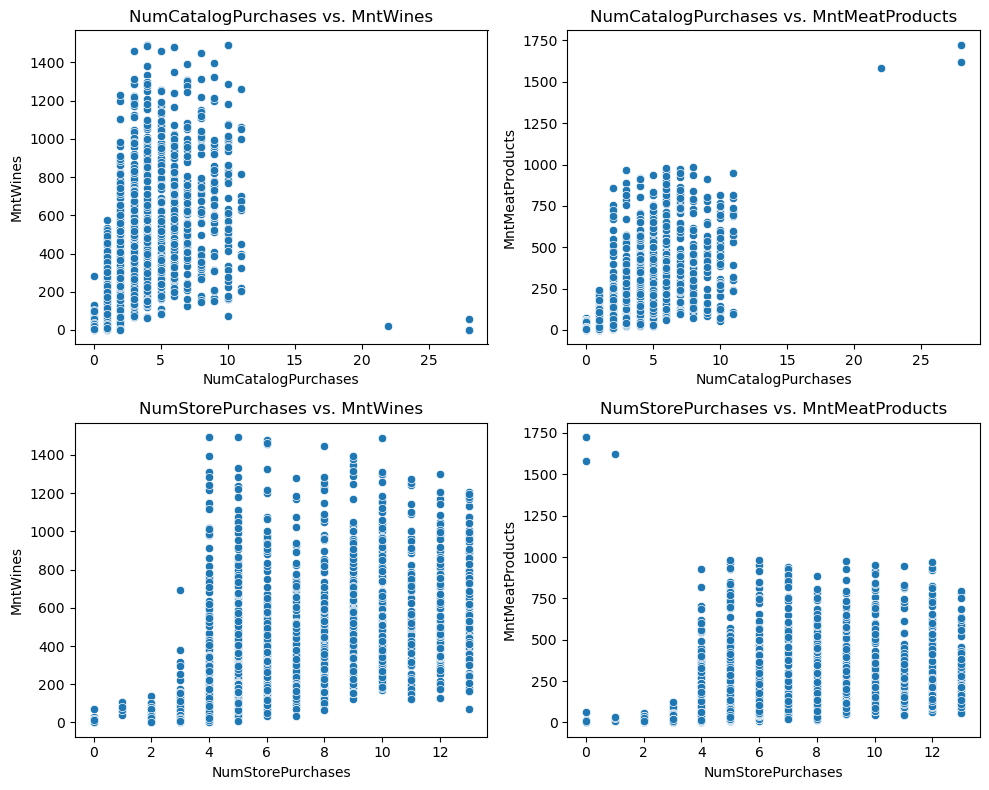

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.scatterplot(ax=axs[0, 0], x=df['NumCatalogPurchases'], y=df['MntWines']).set_title('NumCatalogPurchases vs. MntWines')
sns.scatterplot(ax=axs[0, 1], x=df['NumCatalogPurchases'], y=df['MntMeatProducts']).set_title('NumCatalogPurchases vs. MntMeatProducts')
sns.scatterplot(ax=axs[1, 0], x=df['NumStorePurchases'], y=df['MntWines']).set_title('NumStorePurchases vs. MntWines')
sns.scatterplot(ax=axs[1, 1], x=df['NumStorePurchases'], y=df['MntMeatProducts']).set_title('NumStorePurchases vs. MntMeatProducts')

plt.tight_layout()
plt.show()

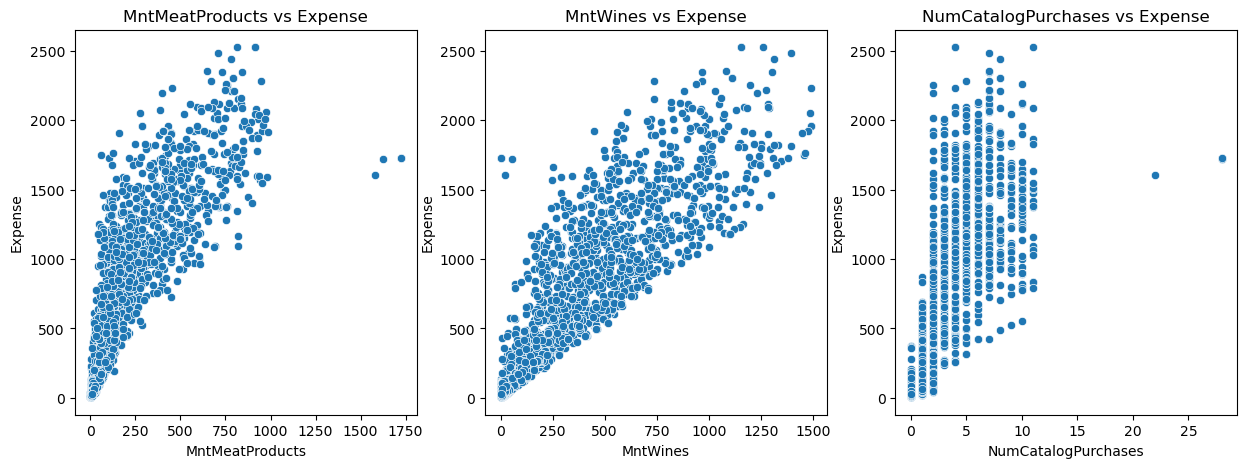

In [64]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))

sns.scatterplot(x=df['MntMeatProducts'], y=df['Expense'], ax=axes[0])
axes[0].set_title('MntMeatProducts vs Expense')

sns.scatterplot(x=df['MntWines'], y=df['Expense'], ax=axes[1])
axes[1].set_title('MntWines vs Expense')

sns.scatterplot(x=df['NumCatalogPurchases'], y=df['Expense'], ax=axes[2])
axes[2].set_title('NumCatalogPurchases vs Expense')

plt.show()


__Observation:__  
* The correlations of `MntWines` and `Income`, and `MntMeatProducts` and `Income` show spearman correlation values of 0.830056 and 0.816815 respectively, and the scatter plot results show a strong positive correlation. The correlation between `MntWines` and `MntMeatProducts` shows a spearman correlation value of 0.824089. It could be that customers who make meat purchases also simultaneously make wine purchases.

* The correlations of `NumCatalogPurchases` with `MntWines` and `MntMeatProducts` are 0.822926 and 0.853744 respectively. This is evidence of the strong relationship between wine and meat purchases through catalog purchasing. The correlations of `NumStorePurchases` with `MntWines` and `MntMeatProducts` are 0.805352 and 0.779894 respectively. This shows that in addition to using catalogs for purchasing, customers also tend to shop directly in the store to buy wine but not so strongly enough to say also to buy meat.

* An intermediate correlation is also shown from `Income` and `NumCatalogPurchases` with a value of 0.791841, but strong correlation from `Expense` and `NumCatalogPurchases` equals to 0.893936, higher than the correlation `Expense` and `NumStorePurchases` that equals to 0.806500. This means customers who have a relatively high income may have a tendency to expenses for wine and meat through catalog purchasing.

#### Checking Complaint

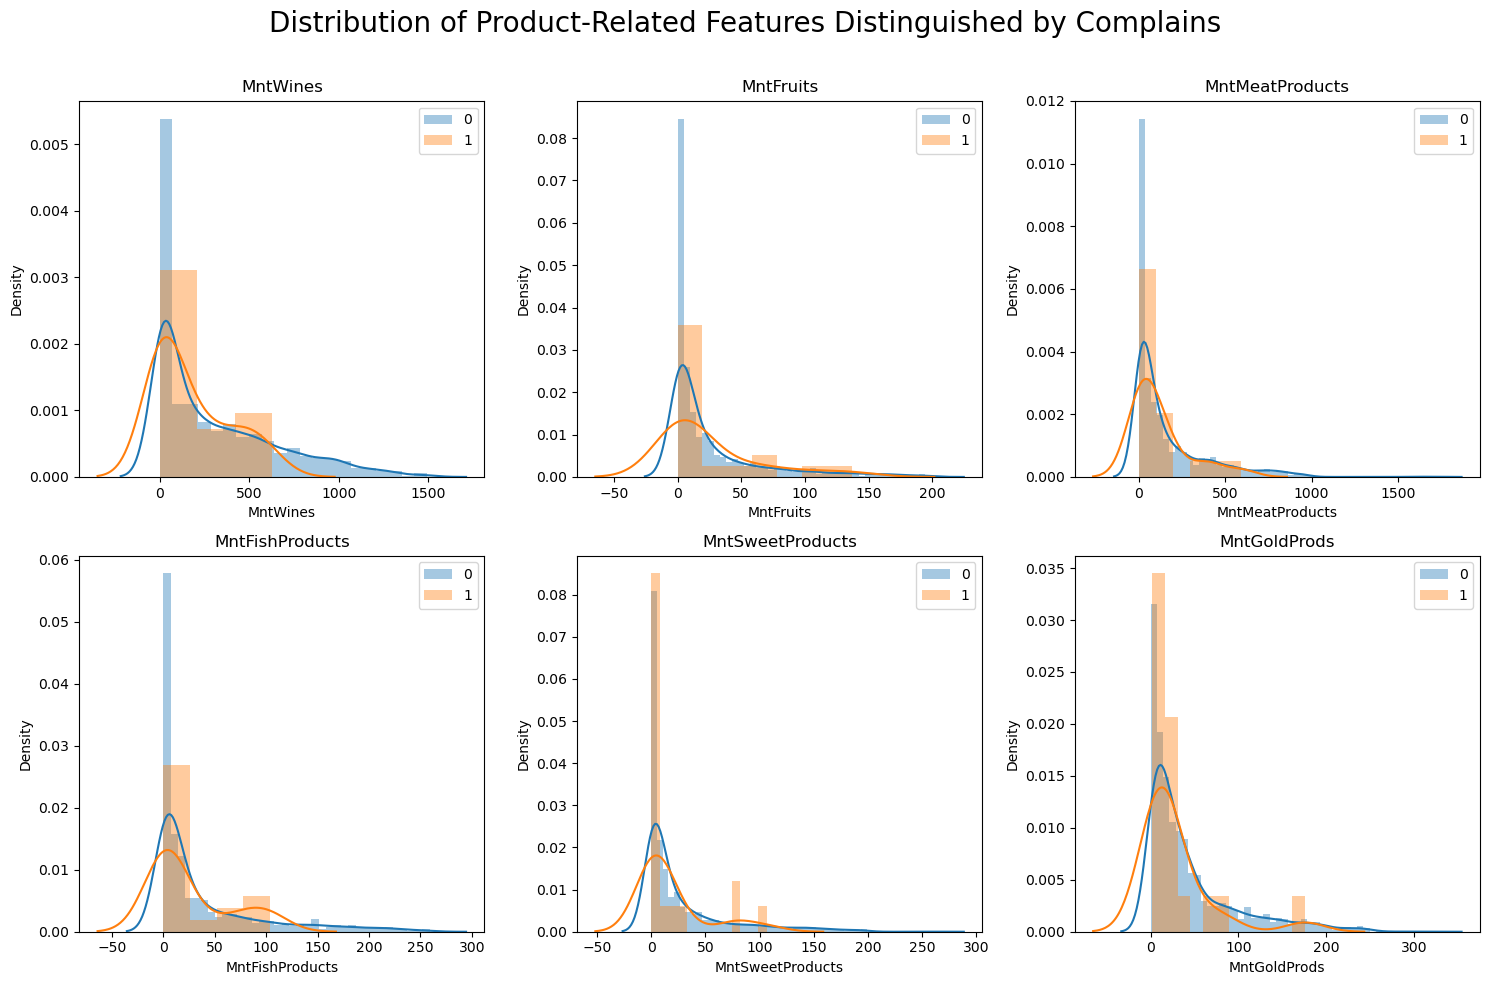

In [65]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# plot each column in a separate subplot
for col, ax in zip(data_product.columns, axes.flatten()):
    sns.distplot(df[df['Complain']==0][col], label='0', ax=ax)
    sns.distplot(df[df['Complain']==1][col], label='1', ax=ax)
    ax.set_title(col)
    ax.legend()
    
fig.suptitle('Distribution of Product-Related Features Distinguished by Complains\n', fontsize = 20)
    
fig.tight_layout()

__Observation:__  
* Based on the histograms of the six commodities above categorized by complaints, it can be seen that the most dominant complaints are in sweet and gold product transactions. As for the few complaints seen in wine purchase transactions of around 600 bottles and above.

#### Sales Performance Throughout Years

In [66]:
# Assuming the column name is 'YearColumn'
unique_years = df['year'].unique()
print("Unique years in the column:", unique_years)


Unique years in the column: [2012 2014 2013]


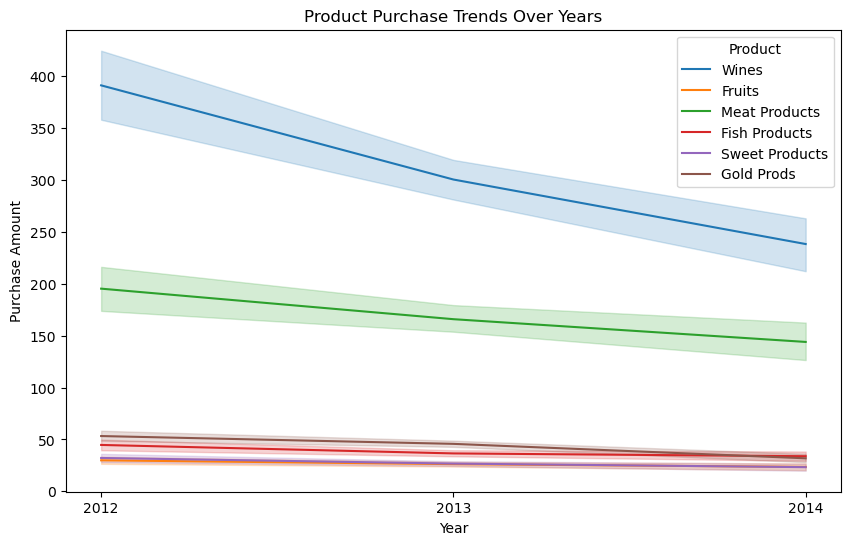

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='MntWines', label='Wines')
sns.lineplot(data=df, x='year', y='MntFruits', label='Fruits')
sns.lineplot(data=df, x='year', y='MntMeatProducts', label='Meat Products')
sns.lineplot(data=df, x='year', y='MntFishProducts', label='Fish Products')
sns.lineplot(data=df, x='year', y='MntSweetProducts', label='Sweet Products')
sns.lineplot(data=df, x='year', y='MntGoldProds', label='Gold Prods')

plt.title('Product Purchase Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Purchase Amount')
plt.legend(title='Product')

plt.xticks(ticks=[2012, 2013, 2014])

plt.show()

__Observation:__  
* Overall, each product experienced a downturn in sales from 2012-2014.
* Even though wine products sold the highest amount compared to other products, there was a gradual decrease in sales for wine products from 2012 to 2014.
* In second place, sales of meat products tended to experience slight declining from 2012-2014.
* For other products other than wine and meat, they are still hardly getting sold and have slightly decreased from 2012-2014.

#### Customer Financial Characteristics 

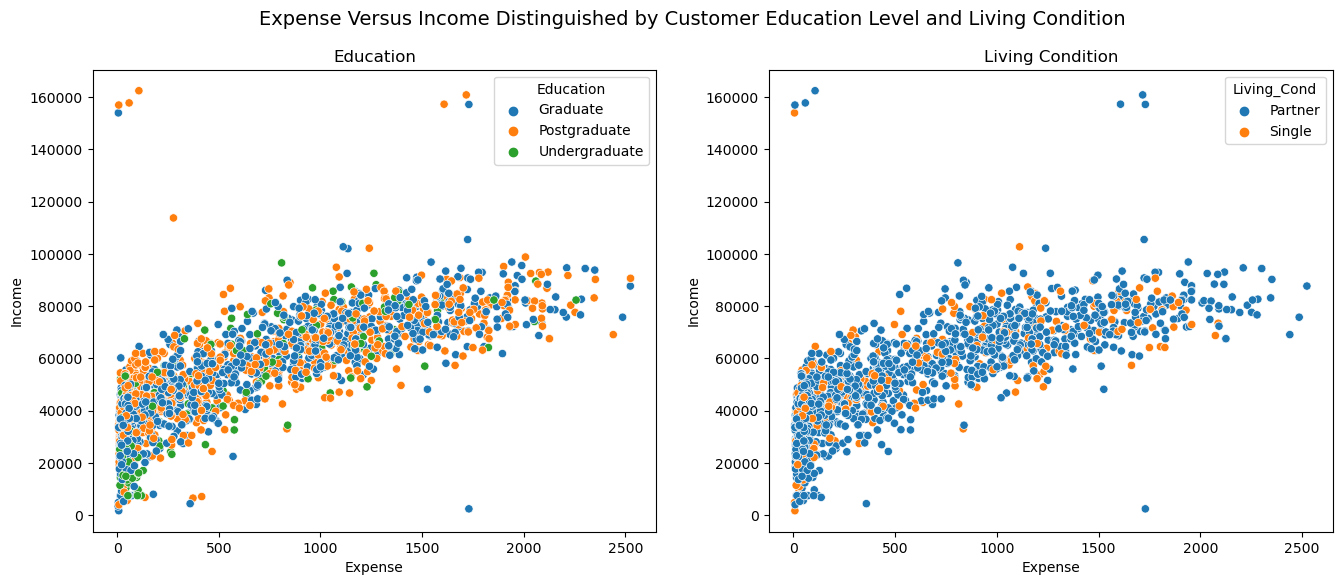

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.scatterplot(x=df['Expense'], y=df[df['Income']<300000]['Income'], hue = df['Education'], ax=axs[0])
axs[0].set_title('Education')

sns.scatterplot(x=df['Expense'], y=df[df['Income']<300000]['Income'], hue = df['Living_Cond'], ax=axs[1])
axs[1].set_title('Living Condition')

fig.suptitle('Expense Versus Income Distinguished by Customer Education Level and Living Condition\n', fontsize = 14)
plt.show()

According to the scatter plot of `Expense` vs `Income` categorized with `Education` showed that customers dominantly are graduate and postgraduate and described a positive correlation, the more they have income the more they allocate to their spent. Moreover, `Expense` vs `Income` categorized with `Living_cond` presented that both type of customers has a positive correlation to allocate their spent based on the income they have.

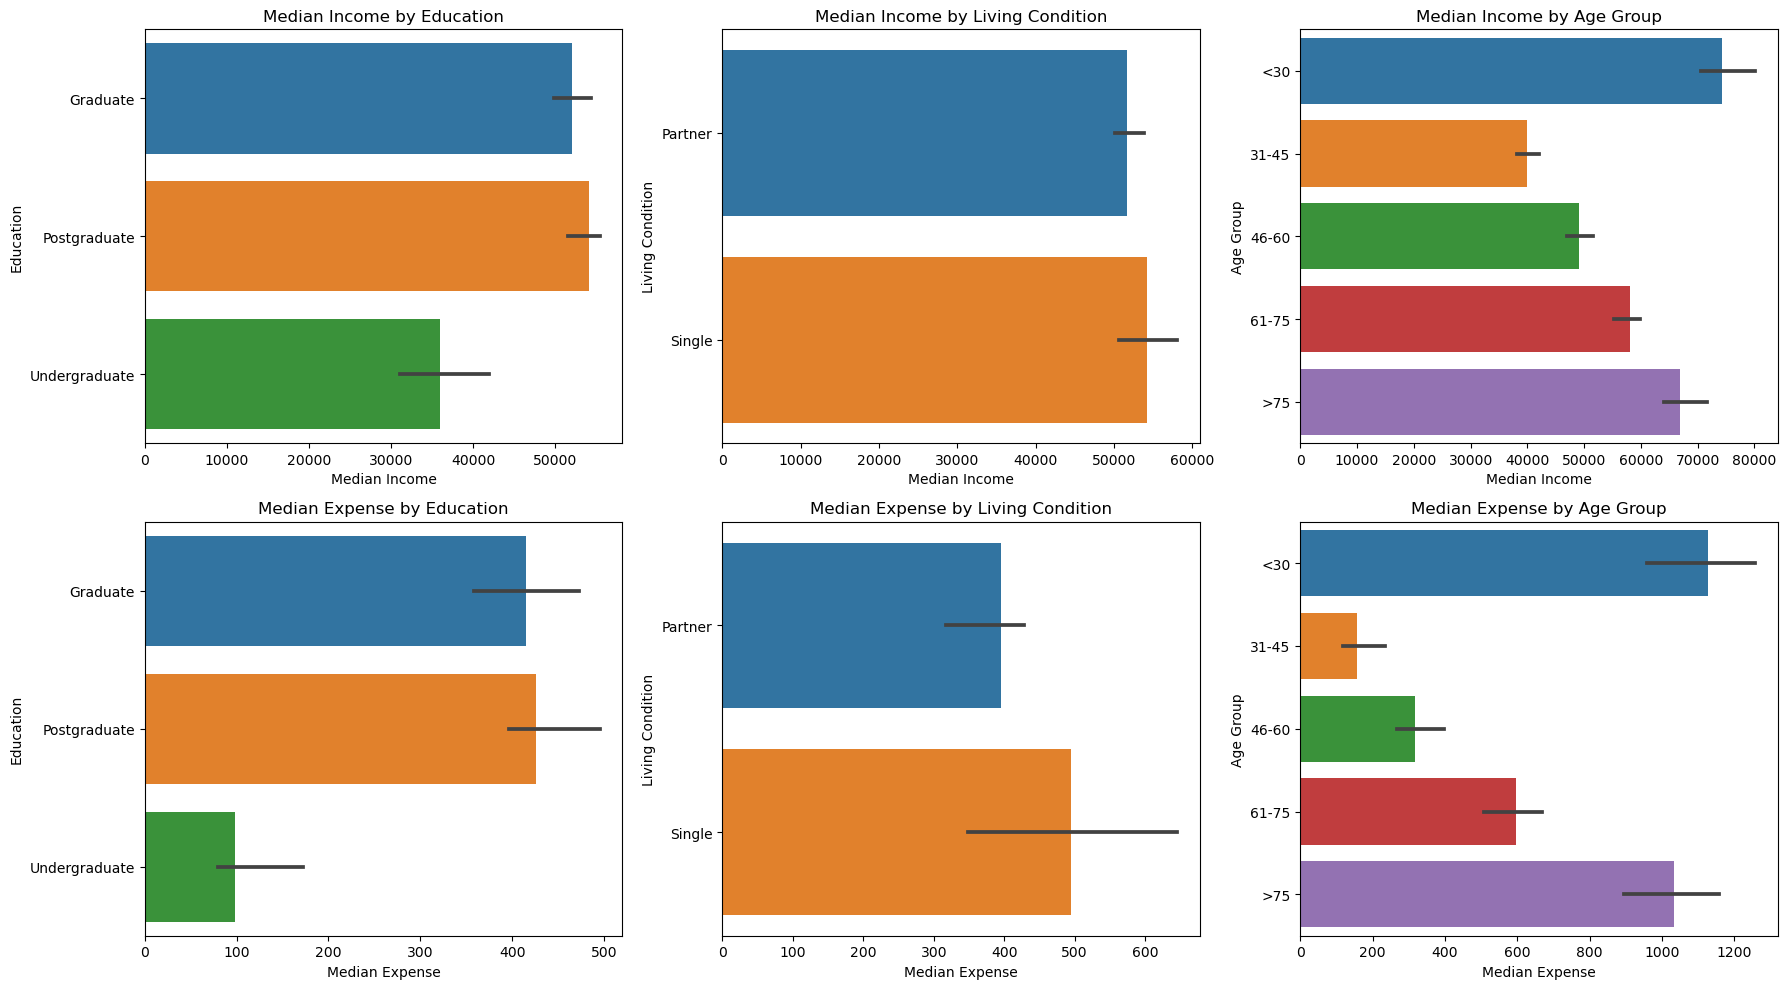

In [69]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Horizontal barplot for Median Income by Education
sns.barplot(x='Income', y='Education', data=df, estimator=np.median, ax=axes[0, 0])
axes[0, 0].set_title('Median Income by Education')
axes[0, 0].set_xlabel('Median Income')
axes[0, 0].set_ylabel('Education')

# Horizontal barplot for Median Income by Living Condition
sns.barplot(x='Income', y='Living_Cond', data=df, estimator=np.median, ax=axes[0, 1])
axes[0, 1].set_title('Median Income by Living Condition')
axes[0, 1].set_xlabel('Median Income')
axes[0, 1].set_ylabel('Living Condition')

# Horizontal barplot for Median Income by Age Group
sns.barplot(x='Income', y='age_group', data=df, estimator=np.median, ax=axes[0, 2])
axes[0, 2].set_title('Median Income by Age Group')
axes[0, 2].set_xlabel('Median Income')
axes[0, 2].set_ylabel('Age Group')

# Horizontal barplot for Median Expense by Education
sns.barplot(x='Expense', y='Education', data=df, estimator=np.median, ax=axes[1, 0])
axes[1, 0].set_title('Median Expense by Education')
axes[1, 0].set_xlabel('Median Expense')
axes[1, 0].set_ylabel('Education')

# Horizontal barplot for Median Expense by Living Condition
sns.barplot(x='Expense', y='Living_Cond', data=df, estimator=np.median, ax=axes[1, 1])
axes[1, 1].set_title('Median Expense by Living Condition')
axes[1, 1].set_xlabel('Median Expense')
axes[1, 1].set_ylabel('Living Condition')

# Horizontal barplot for Median Expense by Age Group
sns.barplot(x='Expense', y='age_group', data=df, estimator=np.median, ax=axes[1, 2])
axes[1, 2].set_title('Median Expense by Age Group')
axes[1, 2].set_xlabel('Median Expense')
axes[1, 2].set_ylabel('Age Group')

# Adjust layout
plt.tight_layout()
plt.show()

__Observation:__  
* Based on education level, the highest income is observed among post-graduates, with a marginal difference from graduates. The highest income is also noted among singles and does not significantly differ from those living with partners.
* Considering age groups, the highest income is found among individuals under 30 years old, followed closely by those above 75 years old.
* Similarly, based on education, the highest expenses are incurred by post-graduates, with minimal distinction from graduates. Among living conditions, the highest expenses are seen among singles. Age-wise, the highest expenses are recorded among individuals under 30, followed by those above 75.

From these observations, it is apparent that higher income levels correlate with higher expenses.

# Business Implementation

To increase sales we need to design a marketing strategy similar to the last marketing strategy in the previous campaign, we need to give promos for transactions made with catalogs for wine and meat products, because there is a high correlation between transactions through catalogs for wine and meat products, this marketing strategy can target age groups under 30 and over 75 years old, with a minimum education level of graduate, both for those who live alone or who are married.

If the selling price of a piece of meat is 7 € and a bottle of wine is 10 €, and if the profit from the sale of meat products is 4 € and wine is 6 € per unit and if the number of products sold for meat is 5.000 pieces and wine is 5.000 bottles for a period of time, with a meat procurement capital of 3 € per piece and a wine procurement capital of 4 € per bottle, then the calculation will be more or less like this:

    meat procurement => 5.000 x 3 € = 15.000 €
    
    wine procurement => 5.000 x 4 € = 20.000 €

    net meat products => 5.000 x 4 € = 20.000 €

    net wine products => 5.000 x 6 € = 30.000 €

    Revenue from meat and wine products => ((5.000 x 4 €) + (5.000 x 6 €)) - ((5.000 x 3 €) + (5.000 x 4 €)) = 15.000 €
    
With the business scheme above, if the company has a capital of 35,000€ to procure wine and meat products and get an income of 50,000€ from the sales of these two products, it will get a revenue of 15,000€ or in other words get a profit of about 42.86%.

# Conclusion and Recommendation

### Conclusion 

  1. The products that consumers spent the most money on during the 2-year period were Wine (50.3%) and Meat product (27.5%).

  2. Customers who purchase wine commodities also tend to purchase meat and vice versa, indicating a potential relationship or preference between the two products.
  
  3. Generally the highest transaction occured during the last marketing campaign with 33.5% and the lowest transaction occured during the 2nd phase of marketing campaign by 3.0%.
  
  4. The performance of the marketing campaign seen in each medium of purchase (website, catalog, store) was best during the last marketing campaign.
  
  5. Based on data without reviewing the market campaign phase, customers made the most transactions in the store (12,855 times) than on the website (9,053 times) and catalog (5,919 times)

### Recommendation 

  1. Wine and meat products are the most sold products, although sales have decreased in the last two years, therefore we need to to increase customer transactions to increase sales by giving promos through catalog transactions, in order to get a revenue of about 42% (assuming sales of wine prices of 10€ per bottle and meat prices of 7€)
  
  2. Plan integrated marketing strategies for wine and meat products using marketing strategies resembling the last marketing campaigns and targeting customers with age groups under 30 and over 75 years old, with a minimum education level of graduate, both for those who live alone or who are married.

  3. Other than cultivating catalogue purchasing especially to sell meat and wine products, it is also important to maintain the website and in-store purchasing system as both still promising.
  
  4. Sales service and the quality of wine sales need to be improved because there are still reports of complaints from customers.